In [1]:
import EntropyHub as eh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [8]:
def generate_entropy(dataset_heart_participant):

    xx = np.array(dataset_heart_participant.iloc[:,1:])
    # Approximate entropy
    approximate_entropy, _ = eh.ApEn(xx)
    # Sample entropy, note
    sample_entrpy, _, _ = eh.SampEn(xx)
    # Fuzzy entropy, note
    fuzzy_entropy, _, _ = eh.FuzzEn(xx)
    # Permutation entropy,note
    permutation_entropy, _, _ = eh.PermEn(xx)
    # Spectral band Entropy (we don't know the edge frequencies)
    spectral_entropy = eh.SpecEn(xx) 
    # Dispersion Entropy, note
    dispersion_entropy,_ = eh.DispEn(xx)
    # Increment entropy
    increment_entropy = eh.IncrEn(xx)
    # Phase entropy, note
    phase_entropy = eh.PhasEn(xx)
    # Slope entropy
    slope_entropy = eh.SlopEn(xx)
    
    # generate entropy dataset
    entropy_feature_participant = [approximate_entropy[-1],sample_entrpy[-1],
                               fuzzy_entropy[-1], permutation_entropy[-1], spectral_entropy[-1],
                               dispersion_entropy, increment_entropy, phase_entropy, slope_entropy[-1]]
    entropy_feature_participant = pd.DataFrame(entropy_feature_participant).T
    entropy_feature_participant.columns = ['approximate_entropy','sample_entrpy','fuzzy_entropy','permutation_entropy',
                                        'spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy',
                                        'slope_entropy']
    return entropy_feature_participant
    
    

In [4]:
def generate_baseline(dataset_gait_participant):
    xx = dataset_gait_participant.iloc[:,1:].T
    # gait mean
    gait_avg = xx.mean()
    # gait std
    gait_std = xx.std()
    # gait coefficient of variation
    gait_cv = (gait_std/gait_avg)
    # gait the standard deviation of the first differenced time series
    gait_stdfd = xx.diff().std()
    # gait max
    gait_max = xx.max()
    # gait min
    gait_min = xx.min()


    # generate baseline dataset
    baseline_feature_participant = [gait_avg, gait_cv]
    baseline_feature_participant = pd.DataFrame(baseline_feature_participant).T
    baseline_feature_participant.columns = ['gait_avg','gait_cv']

    return baseline_feature_participant

1. Process abnormal group. (For normal group, just change the code to ```DATASET_FILE = os.path.join('ptbdb_normal.csv') ```)

In [59]:
DATASET_FILE = os.path.join('ptbdb_abnormal.csv') 
dataset_heart = pd.read_csv(DATASET_FILE)
dataset_heart = dataset_heart.iloc[:,:-1].reset_index(drop=True)
dataset_heart

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.116,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10501,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10502,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10503,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. Raw data visualisation.

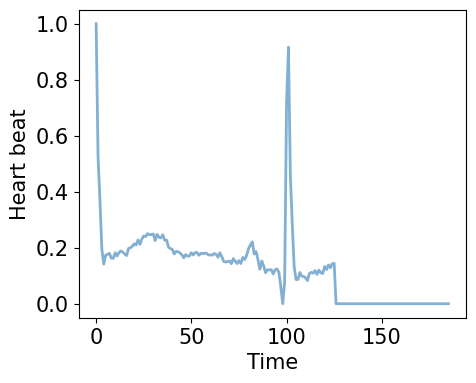

In [62]:
my_x_ticks = np.arange(0, 186, 1)
plt.figure(figsize=(5,4))
plt.plot(my_x_ticks,dataset_heart.iloc[600,:-1], color = '#82B0D2', linewidth=2)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Heart beat',fontsize=15)
my_x_ticks = np.arange(0, 186, 50)
plt.xticks(my_x_ticks, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot_original_data_abnormal_2.png', dpi=700, bbox_inches = 'tight')
plt.show()

3. Generate and save baseline features.

In [ ]:
dataset_heart_entropy = dataset_heart.groupby('index').apply(generate_entropy).reset_index().iloc[:,2:]
dataset_heart_entropy['label'] = 0
dataset_heart_entropy.to_csv('dataset_abnormal_entropy.csv')
dataset_heart_entropy

In [ ]:
dataset_heart_baseline = dataset_heart.groupby('index').apply(generate_baseline).reset_index().iloc[:,2:]
dataset_heart_baseline['label'] = 0
dataset_heart_baseline.to_csv('dataset_abnormal_baseline.csv')
dataset_heart_baseline

In [2]:
baseline_normal = pd.read_csv('dataset_abnormal_baseline.csv', usecols=['gait_avg','gait_cv','label']).reset_index(drop=True)
baseline_normal['label'] = 0
baseline_abnormal = pd.read_csv('dataset_normal_baseline.csv', usecols=['gait_avg','gait_cv','label']).reset_index(drop=True)
baseline_abnormal['label'] = 1
dataset_baseline = pd.concat([baseline_normal, baseline_abnormal],axis=0).reset_index(drop=True)
dataset_baseline.to_csv('dataset_all_baseline.csv')
dataset_baseline

,gait_avg,gait_cv,label
0,0.129408,1.078659,0
1,0.278847,1.077981,0
2,0.194604,1.040161,0
3,0.079581,2.107202,0
4,0.125491,1.251656,0
...,...,...,...
14545,0.147948,1.031817,1
14546,0.072722,1.968665,1
14547,0.185540,0.931877,1
14548,0.147264,1.011337,1


In [10]:
entropy_normal = pd.read_csv('dataset_abnormal_entropy.csv', usecols=['approximate_entropy','sample_entrpy','fuzzy_entropy','permutation_entropy','spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy','slope_entropy','label']).reset_index(drop=True)
entropy_normal['label'] = 0
entropy_abnormal = pd.read_csv('dataset_normal_entropy.csv', usecols=['approximate_entropy','sample_entrpy','fuzzy_entropy','permutation_entropy','spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy','slope_entropy','label']).reset_index(drop=True)
entropy_abnormal['label'] = 1
dataset_entropy = pd.concat([entropy_normal, entropy_abnormal],axis=0).reset_index(drop=True)
dataset_entropy

,approximate_entropy,sample_entrpy,fuzzy_entropy,permutation_entropy,spectral_entropy,dispersion_entropy,increment_entropy,phase_entropy,slope_entropy,label
0,0.492588,0.340446,0.021454,0.975761,0.532653,1.467709,4.156219,0.871765,0.374015,0
1,0.152549,0.049559,0.023901,0.823812,0.363701,0.802964,3.115575,0.868714,0.327461,0
2,0.229232,0.073582,0.027334,0.815511,0.410866,1.261151,3.235758,0.884751,0.355937,0
3,0.196923,0.024438,0.007077,0.719772,0.616643,0.965312,2.233150,0.788908,0.226561,0
4,0.195498,0.049811,0.025497,0.780067,0.494233,1.226413,3.017925,0.905744,0.349555,0
...,...,...,...,...,...,...,...,...,...,...
14545,0.361874,0.305289,0.027600,0.997914,0.533207,1.278987,4.412055,0.839110,0.349555,1
14546,0.144654,0.080994,0.026512,0.923579,0.734055,1.150330,3.948339,0.900999,0.323939,1
14547,0.288067,0.161181,0.031721,0.938315,0.455231,1.236292,4.012056,0.871264,0.340987,1
14548,0.142997,0.070241,0.021764,0.882601,0.462295,1.267327,3.475912,0.902139,0.374015,1


4. Generate, select, and save entropy features.

In [4]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
X_train = dataset_entropy.iloc[:,:-1]
y_train = dataset_entropy.iloc[:, -1]
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.07149532, 0.05101437, 0.05733533, 0.01945144, 0.01387138,
       0.08591373, 0.02960029, 0.12246215, 0.05654376])

In [5]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

phase_entropy          0.122462
dispersion_entropy     0.085914
approximate_entropy    0.071495
fuzzy_entropy          0.057335
slope_entropy          0.056544
sample_entrpy          0.051014
increment_entropy      0.029600
permutation_entropy    0.019451
spectral_entropy       0.013871
dtype: float64

In [6]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 4 important features
sel_four_cols = SelectKBest(mutual_info_classif, k=4)
sel_four_cols.fit(X_train, y_train)
X_train.columns[sel_four_cols.get_support()]

Index(['approximate_entropy', 'dispersion_entropy', 'phase_entropy',
       'slope_entropy'],
      dtype='object')

In [11]:
dataset_entropy = pd.DataFrame(dataset_entropy, columns=['phase_entropy','dispersion_entropy','approximate_entropy','fuzzy_entropy','label'])
dataset_entropy.to_csv('dataset_all_entropy.csv')
dataset_entropy

,phase_entropy,dispersion_entropy,approximate_entropy,fuzzy_entropy,label
0,0.871765,1.467709,0.492588,0.021454,0
1,0.868714,0.802964,0.152549,0.023901,0
2,0.884751,1.261151,0.229232,0.027334,0
3,0.788908,0.965312,0.196923,0.007077,0
4,0.905744,1.226413,0.195498,0.025497,0
...,...,...,...,...,...
14545,0.839110,1.278987,0.361874,0.027600,1
14546,0.900999,1.150330,0.144654,0.026512,1
14547,0.871264,1.236292,0.288067,0.031721,1
14548,0.902139,1.267327,0.142997,0.021764,1
